In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading E-Commerce Dataset
train = pd.read_csv('Train.csv')
train

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [3]:
#Checking For Null Values
train.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [4]:
#Checking for Duplicated Values
train.duplicated().sum()

0

## 1.Shipment Efficiency:

* What factors most significantly impact whether a shipment is delivered on time?
* How does the mode of shipment (e.g., Flight, Ship) influence delivery times?

In [5]:
#Filtering for 1st Task
train1 = train[['Mode_of_Shipment','Product_importance','Weight_in_gms','Reached.on.Time_Y.N']]
train1

,Mode_of_Shipment,Product_importance,Weight_in_gms,Reached.on.Time_Y.N
0,Flight,low,1233,1
1,Flight,low,3088,1
2,Flight,low,3374,1
3,Flight,medium,1177,1
4,Flight,medium,2484,1
...,...,...,...,...
10994,Ship,medium,1538,1
10995,Ship,medium,1247,0
10996,Ship,low,1155,0
10997,Ship,medium,1210,0


In [6]:
#sorting values based on Weight in Grams
train1.sort_values(by='Weight_in_gms', ascending=False)

,Mode_of_Shipment,Product_importance,Weight_in_gms,Reached.on.Time_Y.N
199,Ship,medium,7846,1
245,Ship,medium,7684,1
198,Ship,medium,7640,1
205,Ship,medium,7588,1
213,Ship,medium,7401,1
...,...,...,...,...
4813,Ship,medium,1003,0
6287,Road,medium,1002,0
6033,Flight,medium,1001,0
7155,Ship,low,1001,1


In [7]:
#Defragment Dataset to Identify Crucial Points
Slim = train1[train1['Weight_in_gms'] <= 3000]
Fat = train1[train1['Weight_in_gms'] >= 3000]
Low = train1[train1['Product_importance'] == 'low']
Mid = train1[train1['Product_importance'] == 'medium']
High = train1[train1['Product_importance'] == 'high']

In [8]:
#Displaying Ontime / Late arrivals based on slim & big transports as well as product importance to be handled with care
print('Delivery Evaluation on Slim : ',(Slim['Reached.on.Time_Y.N'] == 1).sum(), '/' ,(Slim['Reached.on.Time_Y.N'] == 0).sum())
print('Delivery Evaluation on Fat : ',(Fat['Reached.on.Time_Y.N'] == 1).sum(), '/' ,(Fat['Reached.on.Time_Y.N'] == 0).sum())
print('Delivery Evaluation on Low : ',(Low['Reached.on.Time_Y.N'] == 1).sum(),'/',(Low['Reached.on.Time_Y.N'] == 0).sum())
print('Delivery Evaluation on Medium : ',(Mid['Reached.on.Time_Y.N'] == 1).sum(),'/',(Mid['Reached.on.Time_Y.N'] == 0).sum())
print('Delivery Evaluation on High : ',(High['Reached.on.Time_Y.N'] == 1).sum(), '/',(High['Reached.on.Time_Y.N'] == 0).sum())

Delivery Evaluation on Slim :  3098 / 1046
Delivery Evaluation on Fat :  3465 / 3390
Delivery Evaluation on Low :  3140 / 2157
Delivery Evaluation on Medium :  2807 / 1947
Delivery Evaluation on High :  616 / 332


In [9]:
#Same process but with shipment methods
Air = train1[train1['Mode_of_Shipment'] == 'Flight']
Land = train1[train1['Mode_of_Shipment'] == 'Road']
Sea = train1[train1['Mode_of_Shipment'] == 'Ship']

In [10]:
print('Delivery Evaluation on Planes : ',(Air['Reached.on.Time_Y.N'] == 1).sum(), '/' ,(Air['Reached.on.Time_Y.N'] == 0).sum())
print('Delivery Evaluation on Vehicles : ',(Land['Reached.on.Time_Y.N'] == 1).sum(), '/' ,(Land['Reached.on.Time_Y.N'] == 0).sum())
print('Delivery Evaluation on Ships : ',(Sea['Reached.on.Time_Y.N'] == 1).sum(), '/' ,(Sea['Reached.on.Time_Y.N'] == 0).sum())

Delivery Evaluation on Planes :  1069 / 708
Delivery Evaluation on Vehicles :  1035 / 725
Delivery Evaluation on Ships :  4459 / 3003


In [11]:
#assembling each sum of values into their respective variable to be used in a chart
SY = (Slim['Reached.on.Time_Y.N'] == 1).sum()
SN = (Slim['Reached.on.Time_Y.N'] == 0).sum()
FY = (Fat['Reached.on.Time_Y.N'] == 1).sum()
FN = (Fat['Reached.on.Time_Y.N'] == 0).sum()
LY = (Low['Reached.on.Time_Y.N'] == 1).sum()
LN = (Low['Reached.on.Time_Y.N'] == 0).sum()
MY = (Mid['Reached.on.Time_Y.N'] == 1).sum()
MN = (Mid['Reached.on.Time_Y.N'] == 0).sum()
HY = (High['Reached.on.Time_Y.N'] == 1).sum()
HN = (High['Reached.on.Time_Y.N'] == 0).sum()
AY = (Air['Reached.on.Time_Y.N'] == 1).sum()
AN = (Air['Reached.on.Time_Y.N'] == 0).sum()
LaY = (Land['Reached.on.Time_Y.N'] == 1).sum()
LaN = (Land['Reached.on.Time_Y.N'] == 0).sum()
SeY = (Sea['Reached.on.Time_Y.N'] == 1).sum()
SeN = (Sea['Reached.on.Time_Y.N'] == 0).sum()

In [12]:
#Weight Pie Chart
data = {
    'Category': ['Slim: On-Time', 'Slim: Late Arrival', 'Fat: On-Time', 'Fat: Late Arrival'],
    'Count': [SY, SN, FY, FN]
}

df = pd.DataFrame(data)

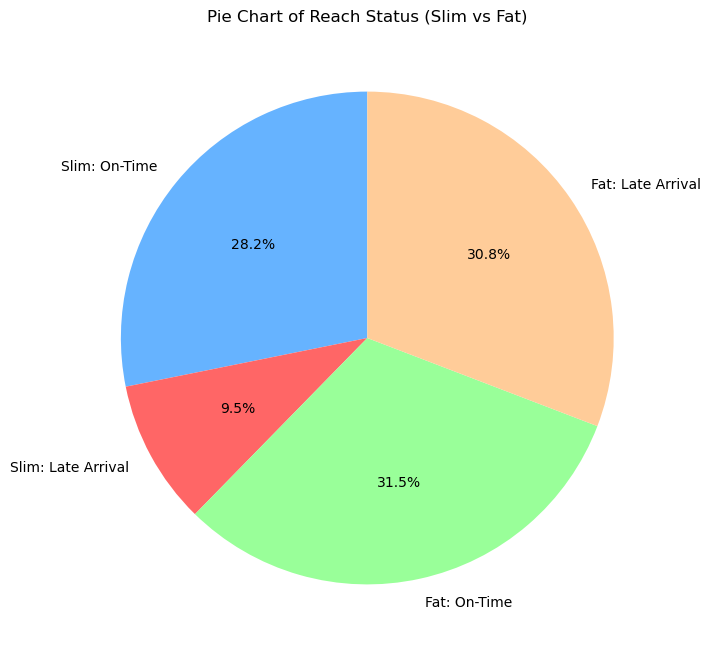

In [13]:
df.set_index('Category')['Count'].plot.pie(
    autopct='%1.1f%%', 
    figsize=(8, 8), 
    startangle=90, 
    colors=['#66b3ff', '#ff6666', '#99ff99', '#ffcc99']
)
plt.title('Pie Chart of Reach Status (Slim vs Fat)')
plt.ylabel('') 
plt.show()

In [14]:
#Product Importance Pie Chart
data = {
    'Category': ['Low: On-Time', 'Low: Late Arrival', 'Medium: On-Time', 'Medium: Late Arrival', 'High: On-Time', 'High: Late Arrival'],
    'Count': [LY, LN, MY, MN, HY, HN]
}

df = pd.DataFrame(data)

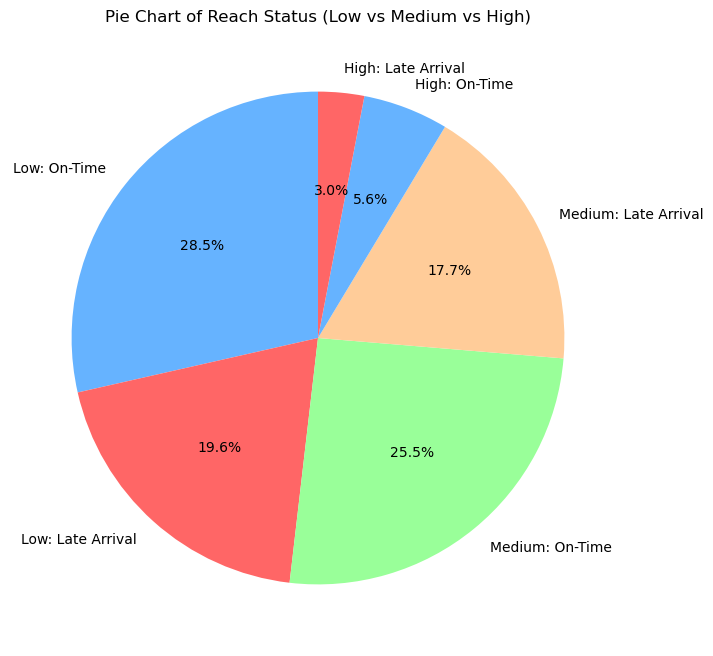

In [15]:
df.set_index('Category')['Count'].plot.pie(
    autopct='%1.1f%%', 
    figsize=(8, 8), 
    startangle=90, 
    colors=['#66b3ff', '#ff6666', '#99ff99', '#ffcc99']
)
plt.title('Pie Chart of Reach Status (Low vs Medium vs High)')
plt.ylabel('') 
plt.show()

In [16]:
data = {
    'Category': ['Flight: On-Time', 'Flight: Late Arrival', 'Road: On-Time', 'Road: Late Arrival', 'Ship: On-Time', 'Ship: Late Arrival'],
    'Count': [FY, FN, LaY, LaN, SeY, SeN]
}

df = pd.DataFrame(data)

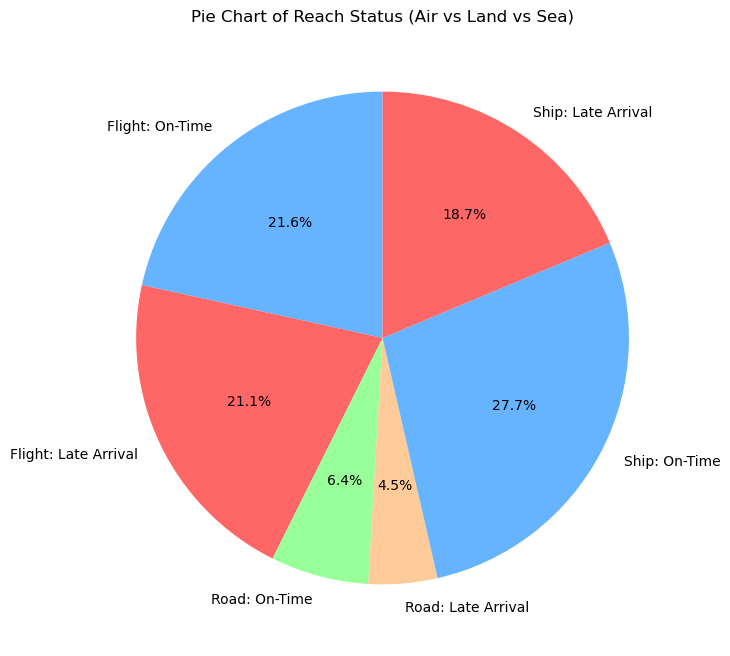

In [17]:
df.set_index('Category')['Count'].plot.pie(
    autopct='%1.1f%%', 
    figsize=(8, 8), 
    startangle=90, 
    colors=['#66b3ff', '#ff6666', '#99ff99', '#ffcc99']
)
plt.title('Pie Chart of Reach Status (Air vs Land vs Sea)')
plt.ylabel('')
plt.show()

## 2.Customer Insights:

* Is there a correlation between the number of customer care calls and the customer rating?
* How does the discount offered affect customer satisfaction ratings?

In [18]:
train2 = train[['ID','Customer_care_calls','Customer_rating','Discount_offered']]
train2.head()

,ID,Customer_care_calls,Customer_rating,Discount_offered
0,1,4,2,44
1,2,4,5,59
2,3,2,2,48
3,4,3,3,10
4,5,2,2,46


In [19]:
#Calculating Correlation between Customer Care Calls and Rating
correlation = train2['Customer_care_calls'].corr(train2['Customer_rating'])
print(round(correlation, 4), 'There is a Weak Positive Correlation Between Them')

0.0122 There is a Weak Positive Correlation Between Them


In [20]:
#Sorting using the Highest Discounts
train2.sort_values(by='Discount_offered', ascending=False)

,ID,Customer_care_calls,Customer_rating,Discount_offered
2417,2418,3,4,65
624,625,4,3,65
276,277,4,2,65
740,741,4,5,65
2823,2824,2,4,65
...,...,...,...,...
6976,6977,6,5,1
3863,3864,2,4,1
6979,6980,3,5,1
5681,5682,5,4,1


In [21]:
# Acquiring High Discounts to identify relationship
Discount = train2[train2['Discount_offered'] >= 32]
Discount

,ID,Customer_care_calls,Customer_rating,Discount_offered
0,1,4,2,44
1,2,4,5,59
2,3,2,2,48
4,5,2,2,46
7,8,4,1,48
...,...,...,...,...
3125,3126,4,4,41
3126,3127,3,1,48
3130,3131,6,5,50
3131,3132,4,1,55


In [22]:
rate = Discount['Customer_rating'].value_counts()
rate

Customer_rating
1    343
4    338
2    337
5    335
3    319
Name: count, dtype: int64

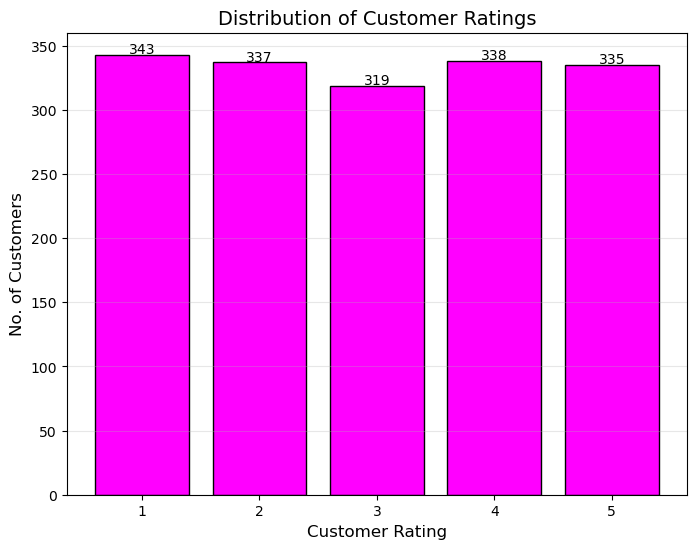

In [23]:
plt.figure(figsize=(8, 6))
plt.bar(rate.index, rate.values, color='magenta', edgecolor='black')
plt.title('Distribution of Customer Ratings', fontsize=14)
plt.xlabel('Customer Rating', fontsize=12)
plt.ylabel('No. of Customers', fontsize=12)

for i, v in enumerate(rate.values):
    plt.text(rate.index[i], v + 1, str(v), ha='center', fontsize=10)

plt.grid(axis='y', alpha=0.3)

plt.show()

## 3.Product Analysis:

* Do products with higher weights tend to have more delayed deliveries?
* How does the cost of a product relate to its prioritization (e.g., "low," "medium," "high")?

In [24]:
train3 = train[['Cost_of_the_Product','Product_importance']]
train3

,Cost_of_the_Product,Product_importance
0,177,low
1,216,low
2,183,low
3,176,medium
4,184,medium
...,...,...
10994,252,medium
10995,232,medium
10996,242,low
10997,223,medium


In [25]:
e = train3.sort_values(by='Cost_of_the_Product', ascending=False)
f= train3[train3['Cost_of_the_Product'] >= 280]
f.head()

,Cost_of_the_Product,Product_importance
91,286,low
133,280,medium
262,294,low
465,294,low
486,294,low


In [26]:
status_sums = train3.groupby('Product_importance')['Cost_of_the_Product'].sum()
print(status_sums)

Product_importance
high       193270
low       1123281
medium     995404
Name: Cost_of_the_Product, dtype: int64


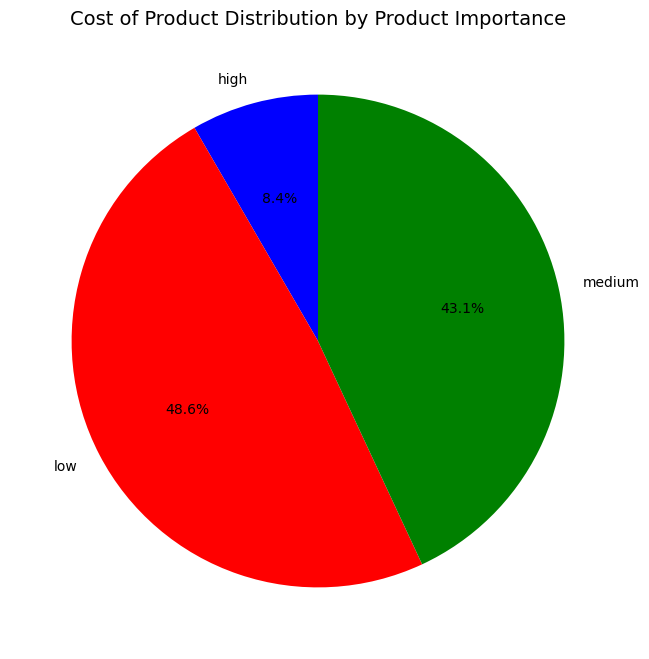

In [27]:
plt.figure(figsize=(8, 8))
plt.pie(status_sums, labels=status_sums.index, autopct='%1.1f%%', startangle=90, colors=['Blue', 'Red', 'Green'])

plt.title('Cost of Product Distribution by Product Importance', fontsize=14)

plt.show()

## 4.Warehouse Performance:

* Which warehouse block has the highest percentage of on-time deliveries?
* Are there significant differences in delivery times based on the warehouse block?

In [28]:
train4 = train[['Warehouse_block','Reached.on.Time_Y.N']]
train4

,Warehouse_block,Reached.on.Time_Y.N
0,D,1
1,F,1
2,A,1
3,B,1
4,C,1
...,...,...
10994,A,1
10995,B,0
10996,C,0
10997,F,0


In [29]:
Ware = train4[train4['Reached.on.Time_Y.N'] == 1]
House = train4[train4['Reached.on.Time_Y.N'] == 0]

In [30]:
Ware['Warehouse_block'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Warehouse_block
F    33.4%
B    16.8%
D    16.7%
C    16.7%
A    16.4%
Name: proportion, dtype: object

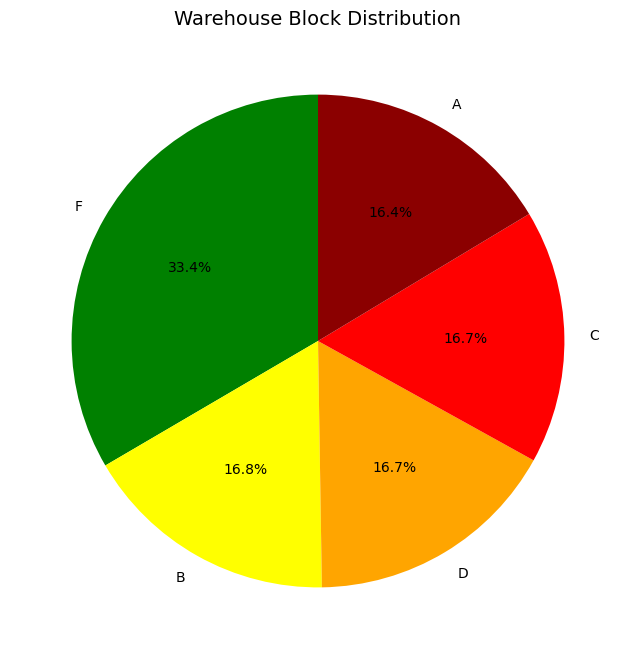

In [31]:
ontime_percentages = Ware['Warehouse_block'].value_counts(normalize=True).mul(100)
plt.figure(figsize=(8, 8))
plt.pie(ontime_percentages, labels=ontime_percentages.index, autopct='%1.1f%%', startangle=90, colors=['Green', 'Yellow', 'Orange', 'Red', 'Darkred'])
plt.title('Warehouse Block Distribution', fontsize=14)
plt.show()


In [32]:
House['Warehouse_block'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Warehouse_block
F    33.2%
A    17.1%
C    16.7%
D    16.6%
B    16.4%
Name: proportion, dtype: object

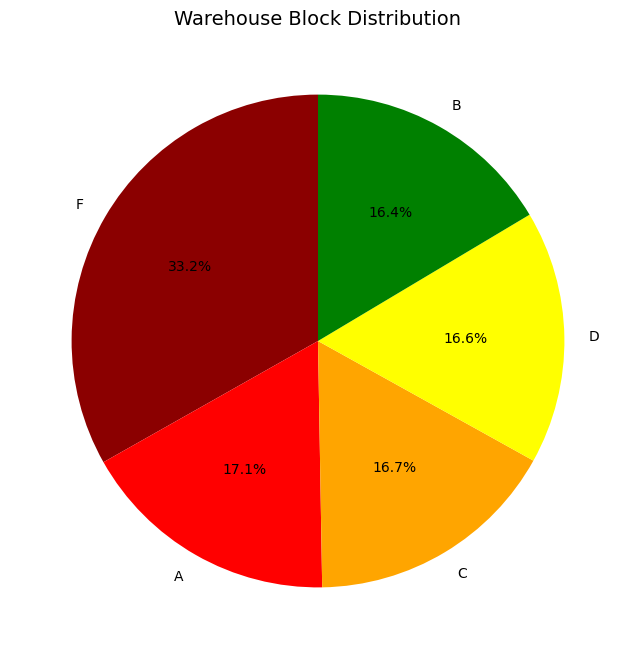

In [33]:
late_percentages = House['Warehouse_block'].value_counts(normalize=True).mul(100)

plt.figure(figsize=(8, 8))
plt.pie(late_percentages, labels=late_percentages.index, autopct='%1.1f%%', startangle=90, colors=['Darkred', 'Red', 'Orange', 'Yellow', 'Green'])
plt.title('Warehouse Block Distribution', fontsize=14)
plt.show()
